<a href="https://colab.research.google.com/github/SaifonCh/code/blob/main/TestRegression_Poly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data file in Google Colab 
# After you run this, you can click to choose data file from your local computer

from google.colab import files

uploaded = files.upload()

Saving WeatherDataP.csv to WeatherDataP.csv


In [2]:

data = pd.read_csv("WeatherDataP.csv")
data  # Display the data

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83
5,1014.52,0.85
6,1014.16,0.83
7,1014.24,0.78
8,1014.25,0.72
9,1013.96,0.61


number of data = 24


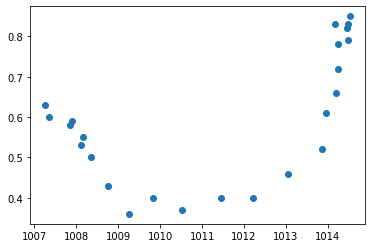

In [3]:
x_temp = data.iloc[:, 0]
len_x = len(x_temp)
x = data.iloc[1:len_x, 0]
y= data.iloc[1:len_x, 1]

print("number of data =", len_x-1)
#x = data[["Pressure (millibars)"]]
#y = data.Humidity
plt.scatter(x, y)
plt.show()

In [13]:
# Select the degree of polynomial to fit in the regression
m = 2
# Number of data points
n = len(x)
print("Number of data points: n =", n )
    
# Finding required sum for least square methods
sumXpow = np.zeros([1,2*m+1])
for i in range(2*m+1):
   sumXpow[0,i] = np.sum(x**(i))  
    
   
# Construct linear system for solving polynomial coefficients    
A = np.zeros([m+1,m+1]) 
b = np.zeros([m+1,1])   

for i in range(m+1):
    b[i,0] = sum(y*(x**i))
    for j in range(m+1):
        A[i,j] =sumXpow[:,i+j]
        

# Finding coefficients: Solve linear system 

coeff = np.linalg.inv(A).dot(b)



# Displaying coefficients a, b & equation
print("\nCoefficients are:", coeff)

Number of data points: n = 24

Coefficients are: [[ 3.01219595e+04]
 [-5.96121663e+01]
 [ 2.94938539e-02]]


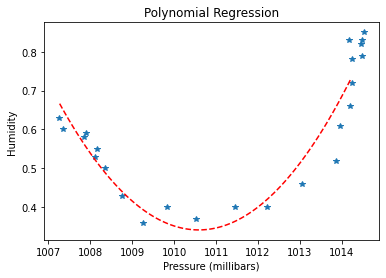

In [14]:
#plot
xgrid = np.linspace(x[1], x[n], 100)
y_xgrid = np.zeros([ np.size(xgrid)]) # initialize
 
# Evaluate the polynomial at xgrid
for i in range(m+1):
    y_xgrid = y_xgrid + coeff[i,0]*(xgrid**i)

plt.figure() 
plt.plot(x, y, '*')
plt.plot(xgrid, y_xgrid, 'r--')
plt.title("Polynomial Regression")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")
plt.show()   # Show the figure (remove the previous instance)
